In [18]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [19]:
analysis = scripts.Analysis()

In [20]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_0_0_0_0_0',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [21]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_0_0_0_0_0',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [22]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [23]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [24]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [25]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [26]:
fig.display_hrefanchor()

In [27]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [28]:
table_dgdgs.display_hrefanchor()

In [29]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

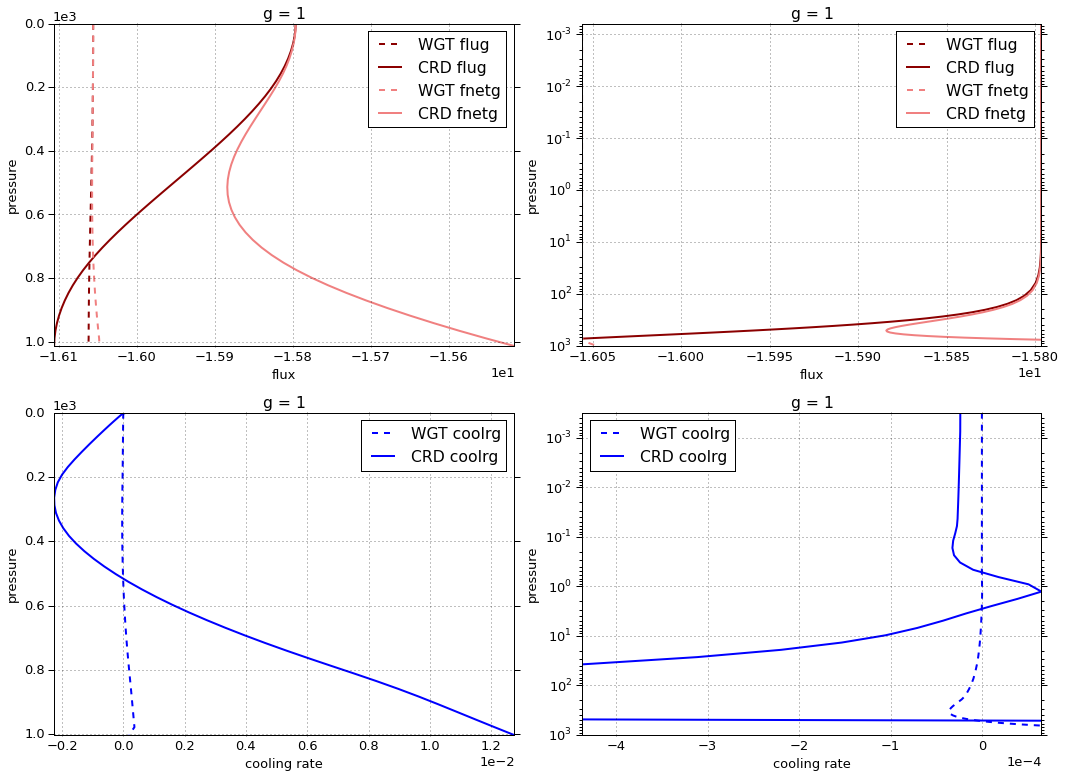

# Figure: flux, cooling rate. g-group 2

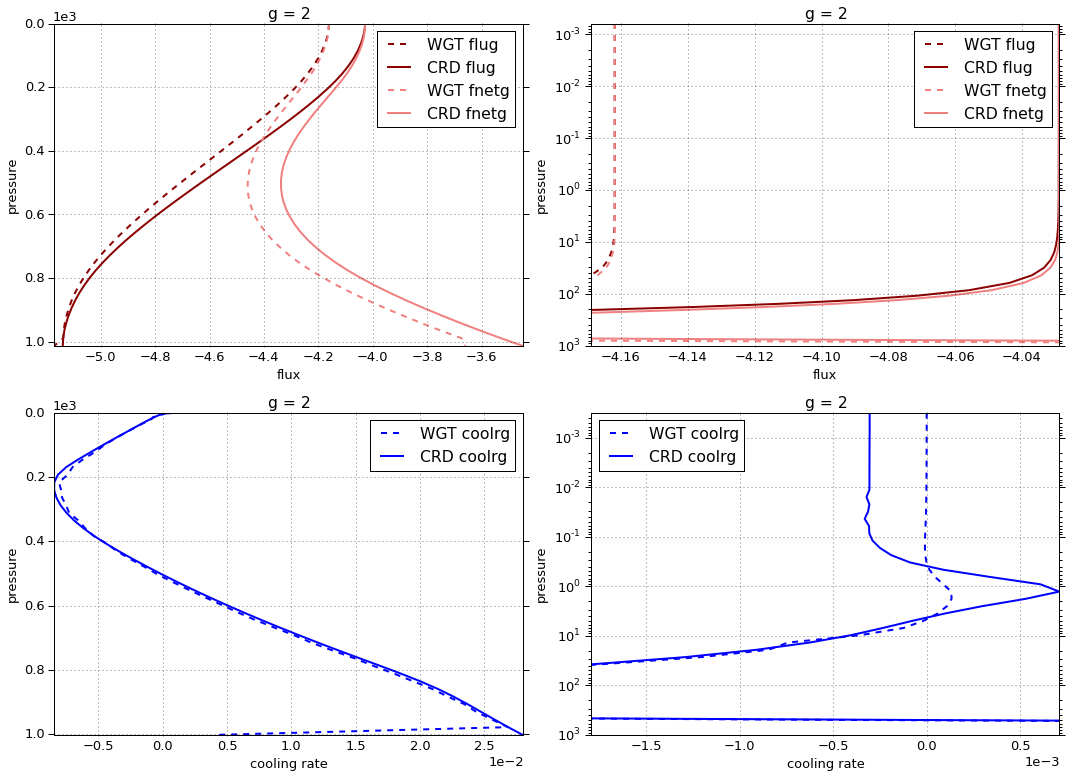

# Figure: flux, cooling rate. g-group 3

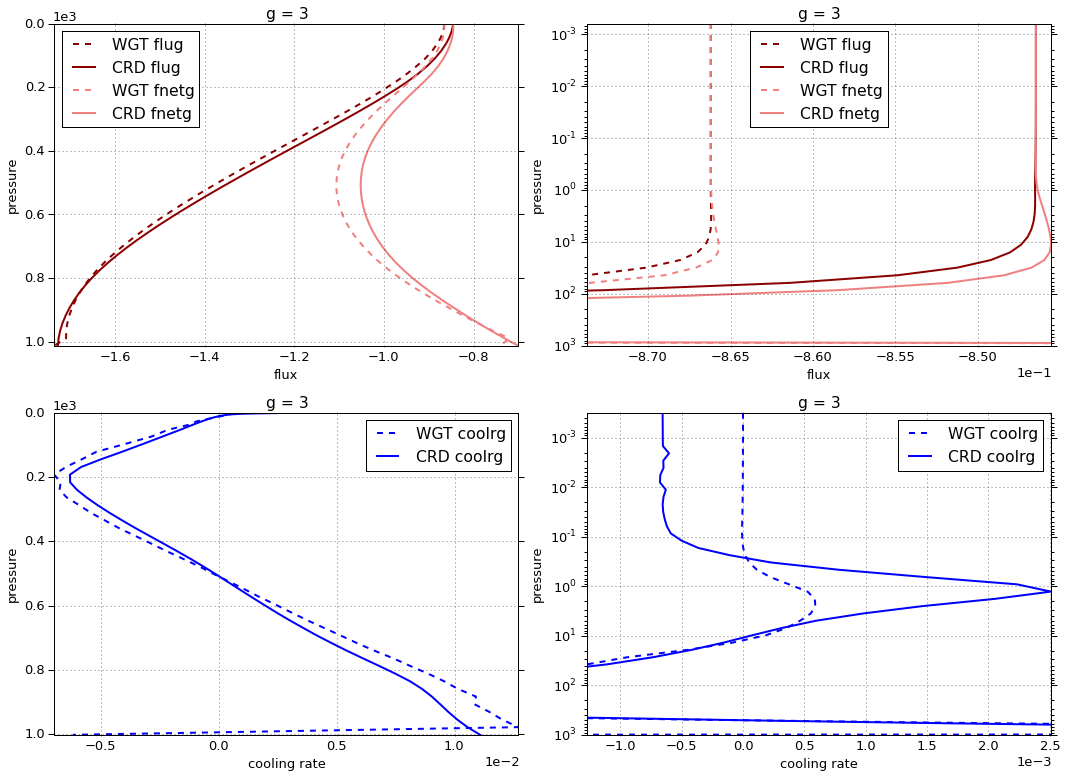

# Figure: flux, cooling rate. g-group 4

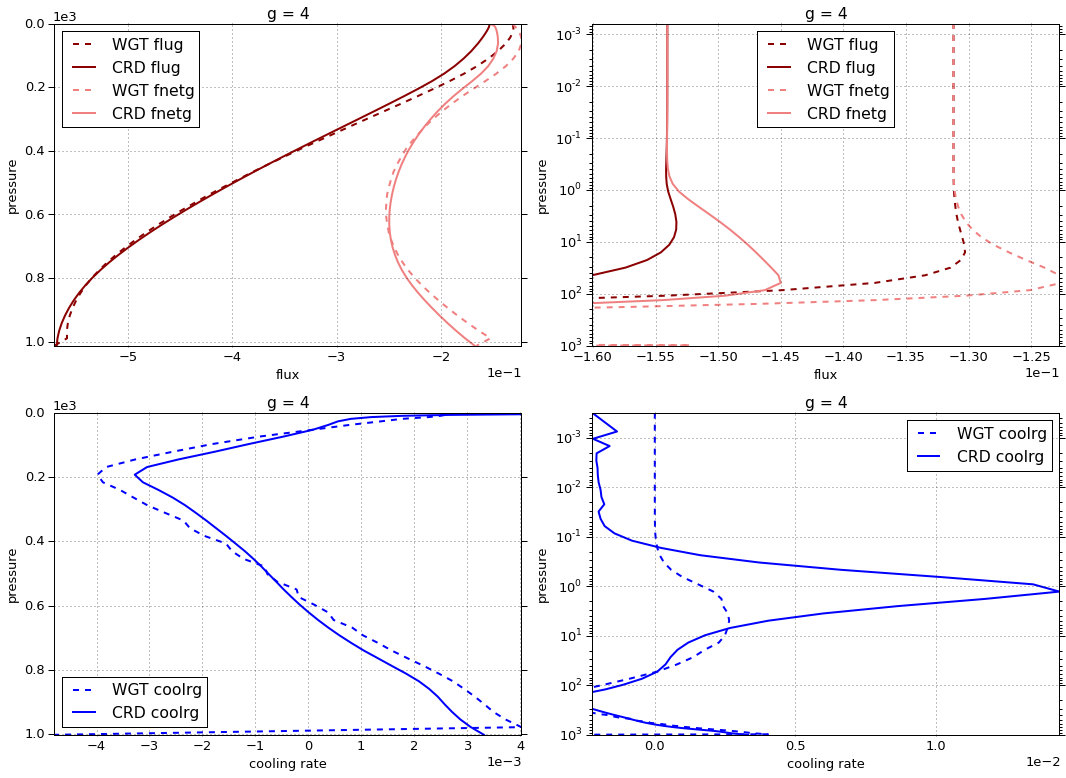

# Figure: flux, cooling rate. g-group 5

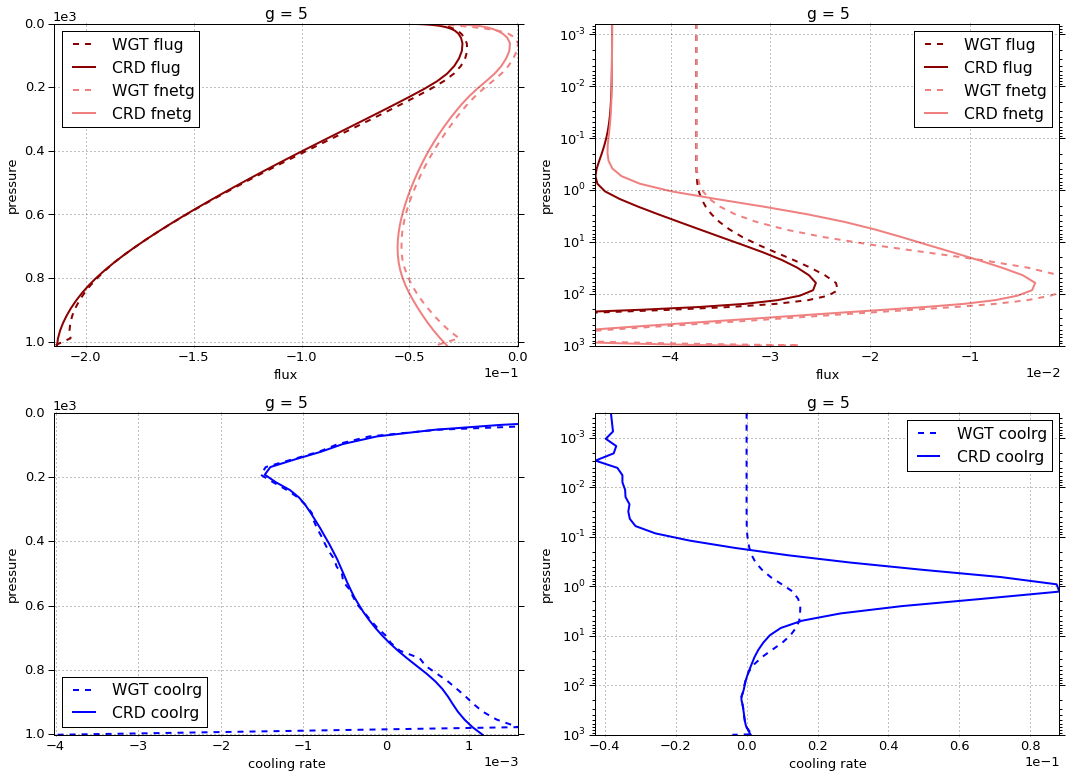

# Figure: flux, cooling rate. g-group total

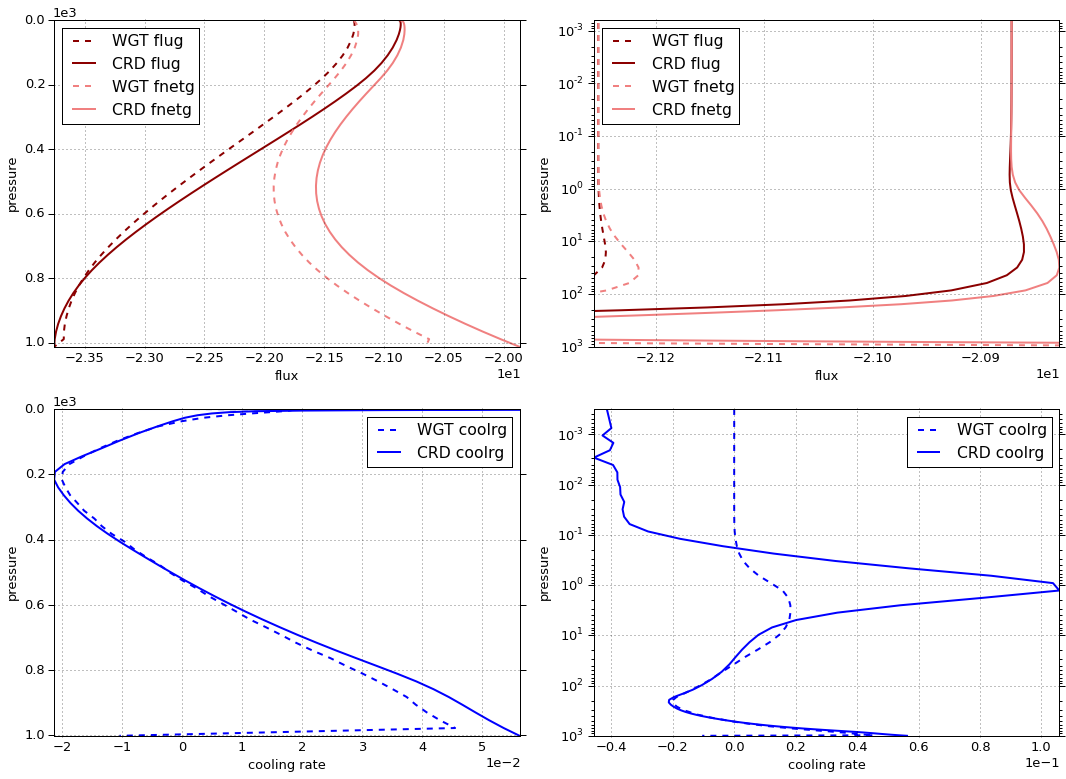

In [30]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [31]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.796510  0.000000 -15.796510
  1013     76    -16.105947  0.588631 -15.517316
2 0        1      -4.029012  0.000000  -4.029012
  1013     76     -5.139632  1.689383  -3.450250
3 0        1      -0.846453  0.000000  -0.846453
  1013     76     -1.727651  1.027208  -0.700443
4 0        1      -0.154066  0.000000  -0.154066
  1013     76     -0.568647  0.401283  -0.167363
5 0        1      -0.045888  0.000000  -0.045888
  1013     76     -0.213294  0.180788  -0.032505


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -16.055974  0.000000 -16.055974
  1013     76    -16.062046  0.014226 -16.047820
2 0        1      -4.161899  0.000000  -4.161899
  1013     76     -5.171342  1.509822  -3.661521
3 0        1      -0.866205  0.000000  -0.866205
  1013     76     -1.736102  0.996779  -0.739323
4 0        1      -0.131216  0.000000  -0.131216
  1013     76     -0.571108  0.405383  -0.165725
5 0        1      -0.037441  0.000000  -0.037441
  1013     76     -0.214572  0.176217  -0.038355


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.259464  0.000000 -0.259464
  1013     76     0.043901 -0.574405 -0.530504
2 0        1     -0.132888  0.000000 -0.132888
  1013     76    -0.031710 -0.179561 -0.211271
3 0        1     -0.019752  0.000000 -0.019752
  1013     76    -0.008451 -0.030429 -0.038880
4 0        1      0.022850  0.000000  0.022850
  1013     76    -0.002462  0.004100  0.001638
5 0        1      0.008447  0.000000  0.008447
  1013     76    -0.001279 -0.004571 -0.005850

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012727
2 0.000312    1     -0.000305
  1001.112500 75     0.027955
3 0.000312    1     -0.000655
  1001.112500 75     0.011083
4 0.000312    1     -0.002232
  1001.112500 75     0.003319
5 0.000312    1     -0.038260
  1001.112500 75     0.001169


WGT


coolrg
g pressure    layer              
1 0.000312    1     -9.606521e-11
  1001.112500 75     1.909481e-04
2 0.000312    1     -4.637548e-08
  1001.112500 75     4.396073e-03
3 0.000312    1     -2.977871e-08
  1001.112500 75    -6.196913e-03
4 0.000312    1     -6.988369e-09
  1001.112500 75    -4.801326e-03
5 0.000312    1     -1.023711e-07
  1001.112500 75    -4.016360e-03


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000024
  1001.112500 75    -0.012536
2 0.000312    1      0.000305
  1001.112500 75    -0.023559
3 0.000312    1      0.000655
  1001.112500 75    -0.017280
4 0.000312    1      0.002232
  1001.112500 75    -0.008120
5 0.000312    1      0.038260
  1001.112500 75    -0.005186

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871928,0.000000,-20.871928
1013,76,-23.755170,3.887293,-19.867877



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.252735,0.000000,-21.252735
1013,76,-23.755171,3.102426,-20.652744



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-3.808063e-01,0.000000,-0.380806
1013,76,-2.000000e-07,-0.784867,-0.784867


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.041477
1001.112500,75,0.056253



WGT


,,coolrg
pressure,layer,
0.000312,1,-1.856097e-07
1001.112500,75,-1.042758e-02



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.041477
1001.112500,75,-0.066680


In [32]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686545,0.676149
2,0.210364,0.217693
3,0.070970,0.073083
4,0.023394,0.024041
5,0.008727,0.009033


In [33]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -16.055974  0.000000e+00 -16.055974   1     1   
0.000624      1     2 -16.055974  3.002707e-16 -16.055974   1     2   
0.000876      1     3 -16.055974  7.553684e-16 -16.055974   1     3   
0.001229      1     4 -16.055974  1.670256e-15 -16.055974   1     4   
0.001723      1     5 -16.055974  3.800301e-15 -16.055974   1     5   
0.002417      1     6 -16.055974  8.051008e-15 -16.055974   1     6   
0.003391      1     7 -16.055974  1.639290e-14 -16.055974   1     7   
0.004757      1     8 -16.055974  3.279050e-14 -16.055974   1     8   
0.006672      1     9 -16.055974  6.496638e-14 -16.055974   1     9   
0.009359      1    10 -16.055974  1.287129e-13 -16.055974   1    10   
0.013128      1    11 -16.055974  2.558916e-13 -16.055974   1    11   
0.018415      1    12 -16.055974  5.069132e-13 -16.055974   1    12   
0.025830      1    13 -16.055974  1.005297e-12 -16.055974   1    13   
0.036232      1    14 -16.055974  1.995364e-12 -16.055974   1    14   
0.050823      1    15 -16.055974  3.986037e-12 -16.055974   1    15   
0.071291      1    16 -16.055974  8.327670e-12 -16.055974   1    16   
0.100000      1    17 -16.055974  1.952161e-11 -16.055974   1    17   
0.140271      1    18 -16.055974  5.177605e-11 -16.055974   1    18   
0.196760      1    19 -16.055974  1.459451e-10 -16.055974   1    19   
0.275997      1    20 -16.055974  4.185427e-10 -16.055974   1    20   
0.387100      1    21 -16.055974  1.199440e-09 -16.055974   1    21   
0.543100      1    22 -16.055974  3.415394e-09 -16.055974   1    22   
0.761700      1    23 -16.055974  9.550532e-09 -16.055974   1    23   
1.068500      1    24 -16.055974  2.494614e-08 -16.055974   1    24   
1.498800      1    25 -16.055974  5.603740e-08 -16.055974   1    25   
2.102400      1    26 -16.055974  1.049506e-07 -16.055974   1    26   
2.949000      1    27 -16.055974  1.759860e-07 -16.055974   1    27   
4.136600      1    28 -16.055974  2.764999e-07 -16.055974   1    28   
5.802500      1    29 -16.055974  4.181373e-07 -16.055974   1    29   
8.139200      1    30 -16.055975  6.194905e-07 -16.055974   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -16.056892  1.849165e-04 -16.056707   1    47   
347.300000    1    48 -16.057051  2.434927e-04 -16.056808   1    48   
371.075000    1    49 -16.057224  3.162715e-04 -16.056908   1    49   
394.850000    1    50 -16.057409  4.052154e-04 -16.057004   1    50   
418.625000    1    51 -16.057605  5.122841e-04 -16.057093   1    51   
442.400000    1    52 -16.057811  6.394419e-04 -16.057172   1    52   
466.175000    1    53 -16.058026  7.886084e-04 -16.057237   1    53   
489.950000    1    54 -16.058247  9.616563e-04 -16.057285   1    54   
513.725000    1    55 -16.058474  1.160457e-03 -16.057313   1    55   
537.500000    1    56 -16.058705  1.386927e-03 -16.057318   1    56   
561.275000    1    57 -16.058939  1.643048e-03 -16.057296   1    57   
585.050000    1    58 -16.059173  1.930856e-03 -16.057242   1    58   
608.825000    1    59 -16.059407  2.252432e-03 -16.057155   1    59   
632.600000    1    60 -16.059639  2.609888e-03 -16.057029   1    60   
656.375000    1    61 -16.059867  3.005357e-03 -16.056861   1    61   
680.150000    1    62 -16.060088  3.440921e-03 -16.056647   1    62   
703.925000    1    63 -16.060302  3.918677e-03 -16.056384   1    63   
727.700000    1    64 -16.060507  4.440760e-03 -16.056066   1    64   
751.475000    1    65 -16.060700  5.009262e-03 -16.055690   1    65   
775.250000    1    66 -16.060879  5.626156e-03 -16.055253   1    66   
799.025000    1    67 -16.061044  6.293112e-03 -16.054751   1    67   
822.800000    1    68 -16.061193  7.011137e-03 -16.054182   1    68   
846.575000    1    69 -16.061325  7.

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')